In [1]:
import keras

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [4]:
# seed random value for reproduciablit
np.random.seed(10)

In [5]:
# read data in dataframe
df_train = pd.read_csv('D:/deepL_google/project/train.csv')

In [6]:
tmp_df = df_train
print(len(tmp_df))
tmp_df.head()

42000


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# split data into feature set and target values
# x_train --> features
# y_trian --> target
x_train = np.array(tmp_df.ix[:,1:785])
y_train = np.array(tmp_df.ix[:,0])

In [8]:
num_classes=10

In [9]:
# convert target values to hot enconding
# in this case we have 10 classes (0-9)
y_labels = keras.utils.to_categorical(y_train, num_classes)

In [10]:
print(x_train.shape)

(42000, 784)


In [11]:
# Reshape data 
X_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
X_train = X_train/255.0
print(X_train.shape)

(42000, 1, 28, 28)


In [12]:
X_train[0,0].shape

(28, 28)

In [13]:
import matplotlib.pyplot as plt

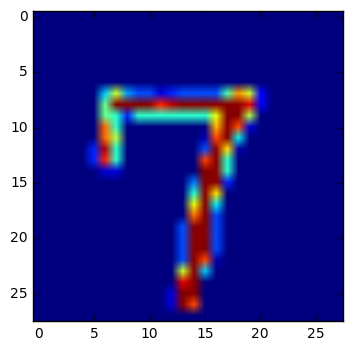

In [14]:
plt.imshow(X_train[6,0])
plt.show()

In [45]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras import backend as K
K.set_image_dim_ordering('th')

Simplest Model with one conv layer and fully connected layer

In [35]:
model = Sequential()
# Convolutional layer with 10 filter and size of 5x5
model.add(Conv2D(10, (5, 5), input_shape=(1, 28, 28), activation='relu'))

# fully connected layer
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 10, 24, 24)        260       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5760)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                57610     
Total params: 57,870.0
Trainable params: 57,870.0
Non-trainable params: 0.0
_________________________________________________________________


In [37]:
# learn dl model
model.fit(X_train, y_labels, epochs=10, batch_size=2000, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 25s - loss: 1.5569 - acc: 0.6890 - val_loss: 0.7686 - val_acc: 0.8326
Epoch 2/10
33600/33600 [==============================] - 3s - loss: 0.5387 - acc: 0.8579 - val_loss: 0.3877 - val_acc: 0.8913
Epoch 3/10
33600/33600 [==============================] - 3s - loss: 0.3510 - acc: 0.8993 - val_loss: 0.3041 - val_acc: 0.9157
Epoch 4/10
33600/33600 [==============================] - 3s - loss: 0.2912 - acc: 0.9170 - val_loss: 0.2674 - val_acc: 0.9239
Epoch 5/10
33600/33600 [==============================] - 3s - loss: 0.2585 - acc: 0.9282 - val_loss: 0.2428 - val_acc: 0.9323
Epoch 6/10
33600/33600 [==============================] - 3s - loss: 0.2333 - acc: 0.9359 - val_loss: 0.2191 - val_acc: 0.9393
Epoch 7/10
33600/33600 [==============================] - 3s - loss: 0.2105 - acc: 0.9415 - val_loss: 0.2014 - val_acc: 0.9444
Epoch 8/10
33600/33600 [==============================] - 3s 

### Adding Dropout to above model

In [40]:
model = Sequential()
# Convolutional layer with 10 filter and size of 5x5
model.add(Conv2D(10, (5, 5), input_shape=(1, 28, 28), activation='relu'))

# Dropout layer
model.add(Dropout(0.2))

# fully connected layer
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 10, 24, 24)        260       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 24, 24)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5760)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                57610     
Total params: 57,870.0
Trainable params: 57,870.0
Non-trainable params: 0.0
_________________________________________________________________


In [42]:
# learn dl model
model.fit(X_train, y_labels, epochs=10, batch_size=2000, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 7s - loss: 1.5617 - acc: 0.6334 - val_loss: 0.7690 - val_acc: 0.8269
Epoch 2/10
33600/33600 [==============================] - 3s - loss: 0.5444 - acc: 0.8563 - val_loss: 0.3890 - val_acc: 0.8883
Epoch 3/10
33600/33600 [==============================] - 3s - loss: 0.3575 - acc: 0.8953 - val_loss: 0.3066 - val_acc: 0.9130
Epoch 4/10
33600/33600 [==============================] - 3s - loss: 0.2994 - acc: 0.9141 - val_loss: 0.2682 - val_acc: 0.9249
Epoch 5/10
33600/33600 [==============================] - 3s - loss: 0.2667 - acc: 0.9237 - val_loss: 0.2398 - val_acc: 0.9340
Epoch 6/10
33600/33600 [==============================] - 3s - loss: 0.2406 - acc: 0.9316 - val_loss: 0.2178 - val_acc: 0.9398
Epoch 7/10
33600/33600 [==============================] - 3s - loss: 0.2202 - acc: 0.9379 - val_loss: 0.2015 - val_acc: 0.9435
Epoch 8/10
33600/33600 [==============================] - 3s -

### Adding pooling layer to above model

In [53]:
model = Sequential()
# Convolutional layer with 10 filter and size of 5x5
model.add(Conv2D(10, (5, 5), input_shape=(1, 28, 28), activation='relu'))

#Max pool layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer
model.add(Dropout(0.2))

# fully connected layer
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 10, 24, 24)        260       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 12, 12)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 12, 12)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                14410     
Total params: 14,670.0
Trainable params: 14,670.0
Non-trainable params: 0.0
_________________________________________________________________


In [55]:
# learn dl model
model.fit(X_train, y_labels, epochs=10, batch_size=2000, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 4s - loss: 1.9951 - acc: 0.4282 - val_loss: 1.5493 - val_acc: 0.7365
Epoch 2/10
33600/33600 [==============================] - 3s - loss: 1.1919 - acc: 0.7535 - val_loss: 0.8141 - val_acc: 0.8163
Epoch 3/10
33600/33600 [==============================] - 3s - loss: 0.6781 - acc: 0.8221 - val_loss: 0.5113 - val_acc: 0.8660
Epoch 4/10
33600/33600 [==============================] - 3s - loss: 0.4882 - acc: 0.8626 - val_loss: 0.3988 - val_acc: 0.8910
Epoch 5/10
33600/33600 [==============================] - 3s - loss: 0.4077 - acc: 0.8840 - val_loss: 0.3480 - val_acc: 0.9051
Epoch 6/10
33600/33600 [==============================] - 3s - loss: 0.3627 - acc: 0.8972 - val_loss: 0.3102 - val_acc: 0.9143
Epoch 7/10
33600/33600 [==============================] - 3s - loss: 0.3317 - acc: 0.9057 - val_loss: 0.2864 - val_acc: 0.9217
Epoch 8/10
33600/33600 [==============================] - 3s -